In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import json, csv
plt.style.use('seaborn-ticks')
import numpy as np
import matplotlib as mpl

In [2]:
output_folders = [os.path.join("Data","AmmSul","OUTPUT"),
                  os.path.join("Data","AmmOx","OUTPUT"),
                  os.path.join("Data","Glucose","OUTPUT-new"),
                  os.path.join("Data","SubericAcid","OUTPUT"),
                  os.path.join("Data","EthylPalmitate","OUTPUT-new")]

nist_files = [os.path.join("Data","NIST", i) for i in ["ammonium_sulfate.csv", "ammonium_oxalate.csv", "glucose.csv", "suberic_acid.csv", "ethylpalmitate.csv"]]

In [3]:
font = {'family' : 'Microsoft Sans Serif',
        'size'   : 18}

mpl.rc('font', **font)

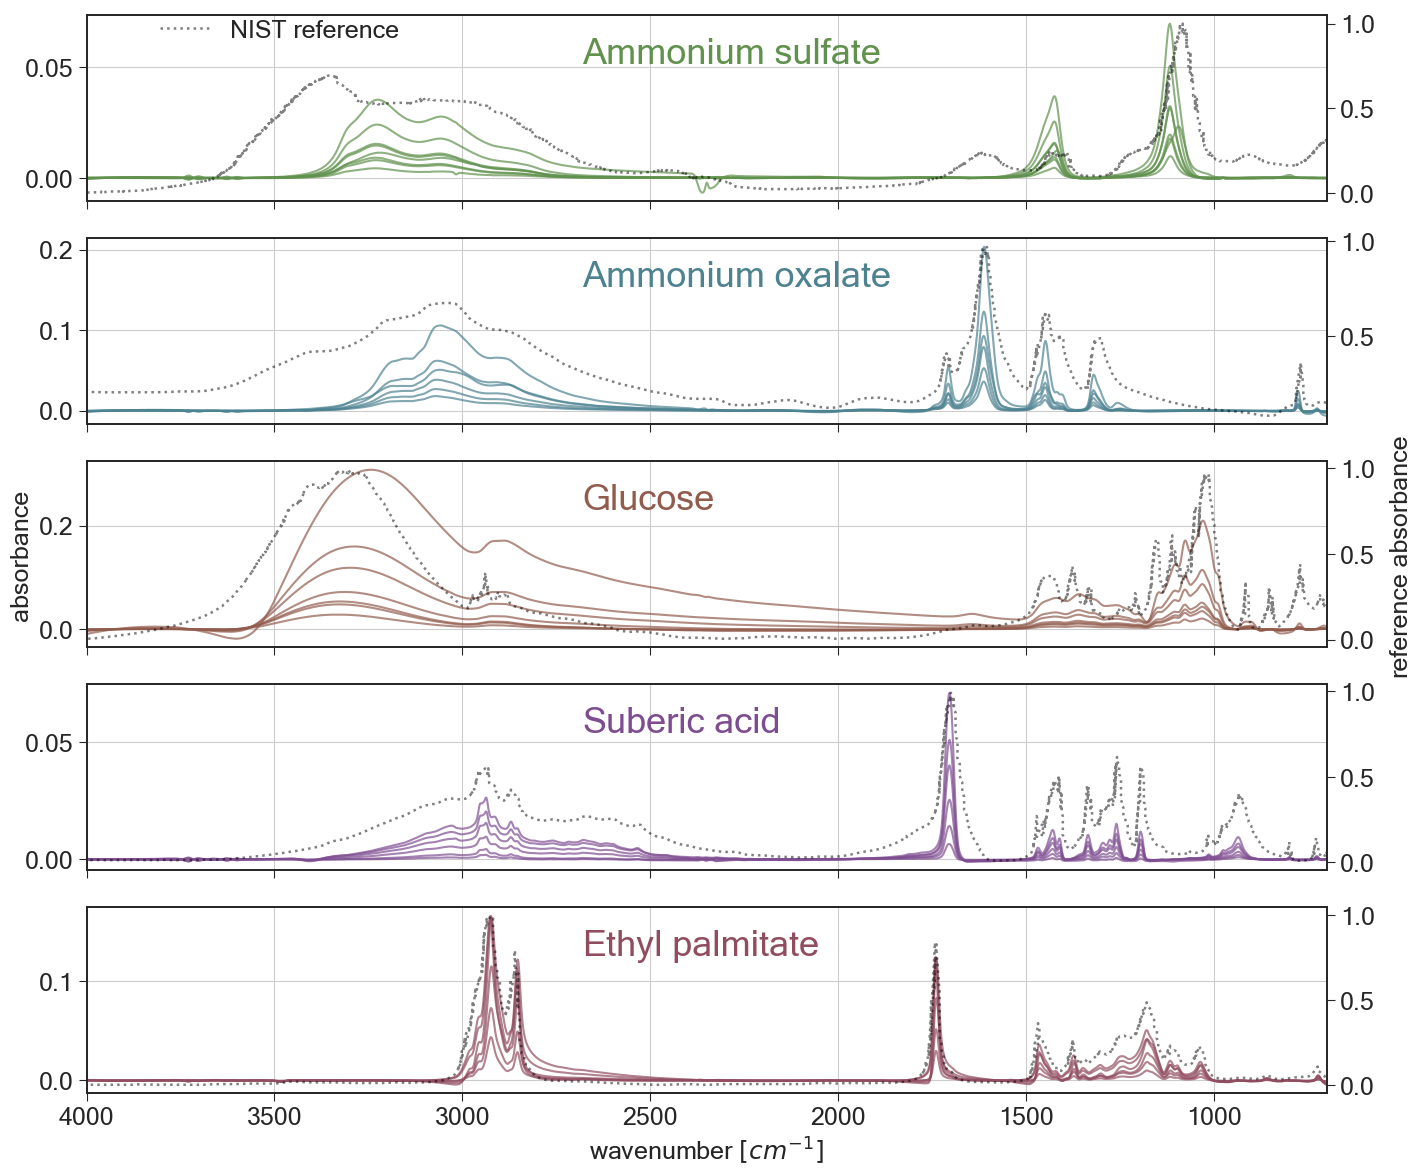

In [36]:
# Create figure
fig, ax = plt.subplots(5, 1, figsize=(16,14), sharex=True)
ax_index = 0

colors_list = ["#60914d","#4d8291","#915c4d", "#7e4d91", "#914d60"]
names = ["Ammonium sulfate", "Ammonium oxalate", "Glucose", "Suberic acid", "Ethyl palmitate"]

for output_folder in output_folders:
    if not os.path.exists(output_folder):
        print(f"Folder couldnt be found {output_folder}")
        break
    
    # Get the file with all experiments numbers 
    exp_file = os.path.join(output_folder, "PeaksFTIRResults.json")
    if not os.path.exists(exp_file):
        raise NotADirectoryError(f"FTIR results path is not a valid directory: {exp_file}")
    with open(exp_file) as json_file_exp:
        Exp_FTIR = json.load(json_file_exp)
    
    # Get nist file
    nist_file_i = nist_files[ax_index]
    if not os.path.exists(nist_file_i):
        raise NotADirectoryError(f"NIST file is not found: {nist_file_i}")
    nist_vals = pd.read_csv(nist_file_i, delimiter=";")
    
    n = len(Exp_FTIR["exp"])
    cmap = mpl.colormaps['BuPu']
    colors = cmap(np.linspace(0.3,1,n))

    ax_other = ax[ax_index].twinx() 

    ax_other.plot(nist_vals["wavenumber"], nist_vals["absorbance"], linestyle = 'dotted', linewidth=1.8, color = "black", alpha=0.5, label=f"NIST reference")
    
    ci = 0
    for exp in Exp_FTIR["exp"]:
        FTIR_result_path = os.path.join(output_folder, f"Exp{exp}FTIRResults.json")
        if not os.path.exists(FTIR_result_path):
            raise NotADirectoryError(f"FTIR results path is not a valid directory: {FTIR_result_path}")
        with open(FTIR_result_path) as json_file:
            FTIR_results_dict = json.load(json_file)

        ax[ax_index].plot(FTIR_results_dict["Wavenumbers"], FTIR_results_dict["Corrected difference"],
            color = colors_list[ax_index], alpha=0.7)
        ci += 1
    

    
    ax[ax_index].set_xlim([700,4000])
    ax[ax_index].grid()
    ax[ax_index].set_title(names[ax_index], color =colors_list[ax_index],  loc='left', y=0.7, x=0.4, fontsize='x-large')
    if ax_index == 2:
        ax[ax_index].set_ylabel("absorbance")
        ax_other.set_ylabel("reference absorbance", labelpad=10)
    
    ax[ax_index].invert_xaxis()
    ax_index += 1
        
#fig.legend(fontsize="9")
ax[ax_index-1].set_xlabel(r"wavenumber $[cm^{-1}]$")
plt.legend(loc = 'upper right', bbox_to_anchor=(0.27, 5.9))
plt.savefig("AllCorrectedAbsorbances_flip_16_14.jpg", dpi=1000)
plt.show()